In [1]:
import pandas as pd

In [2]:
df_flights = pd.read_csv('../../datasets/flights.csv')

df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [5]:
# Check missing values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [9]:
# Impute null values in DepDel15 column
df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [10]:
# Check if there are any non-zero values in DepDelay column
df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [11]:
# This proves that all the records with missing DepDel15 has only 0 minutes of DepDelay.
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)

df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [12]:
# Identify outliers in the DepDelay and ArrDelay columns
df_flights[['DepDelay', 'ArrDelay']]

,DepDelay,ArrDelay
0,4,13
1,3,22
2,-3,-7
3,35,33
4,-1,-9
...,...,...
271935,1,18
271936,24,61
271937,30,15
271938,-5,-6


DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



/var/folders/y0/2q4s2p491774d2647gcjs1wc0000gq/T/ipykernel_82664/349856911.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/y0/2q4s2p491774d2647gcjs1wc0000gq/T/ipykernel_82664/349856911.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


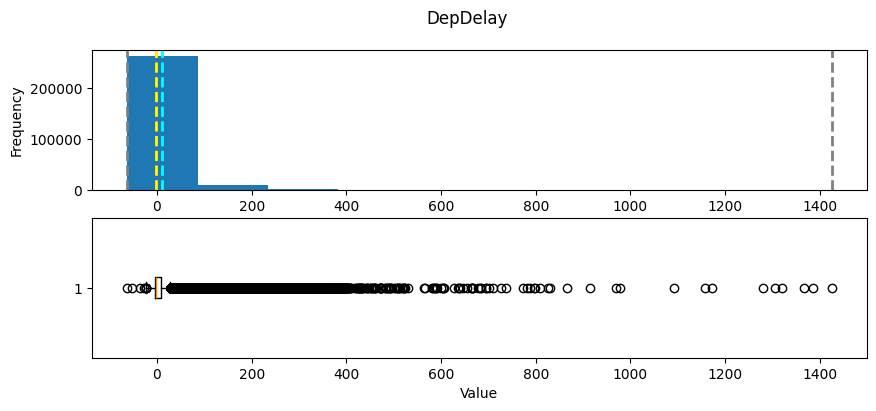

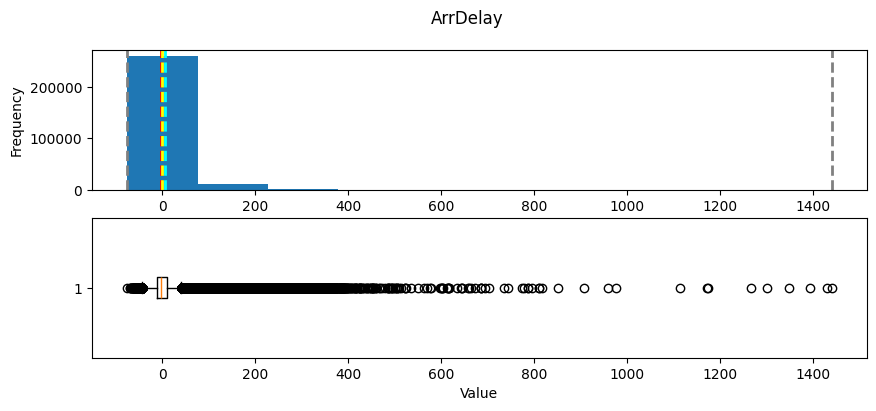

In [16]:
# Function to display summary statistics and distribution of a column in dataframe
def show_distribution(var_data):

    from matplotlib import pyplot as plt
    %matplotlib inline

    # Get statistics
    min_val = var_data.min()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]
    max_val = var_data.max()

    print(var_data.name, '\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val, median_val, mode_val, max_val))

    # Create a figure for two subplots (2 rows and 1 column)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 4))

    # Plot the histogram
    ax1.hist(var_data)
    ax1.set_ylabel('Frequency')

    # Add lines for mean, median, mode
    ax1.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax1.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax1.axvline(x=median_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax1.axvline(x=mode_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax1.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the box plot
    ax2.boxplot(var_data, vert=False)
    ax2.set_xlabel('Value')

    # Add the title to the figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function
delayFields = ['DepDelay', 'ArrDelay']

for col in delayFields:
    show_distribution(df_flights[col])

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



/var/folders/y0/2q4s2p491774d2647gcjs1wc0000gq/T/ipykernel_82664/349856911.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/y0/2q4s2p491774d2647gcjs1wc0000gq/T/ipykernel_82664/349856911.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


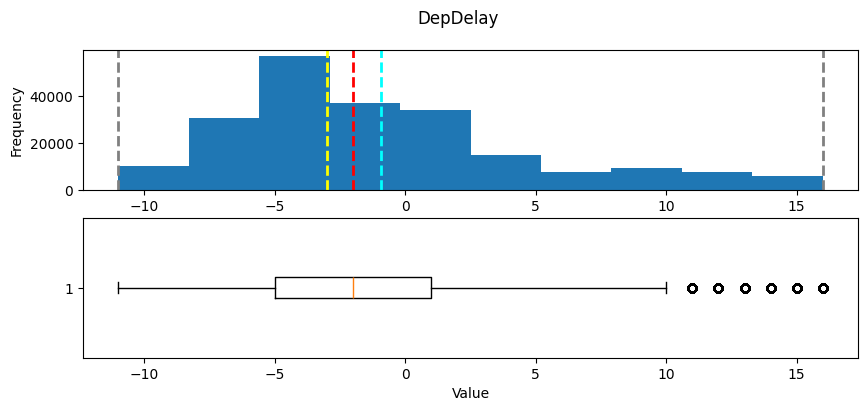

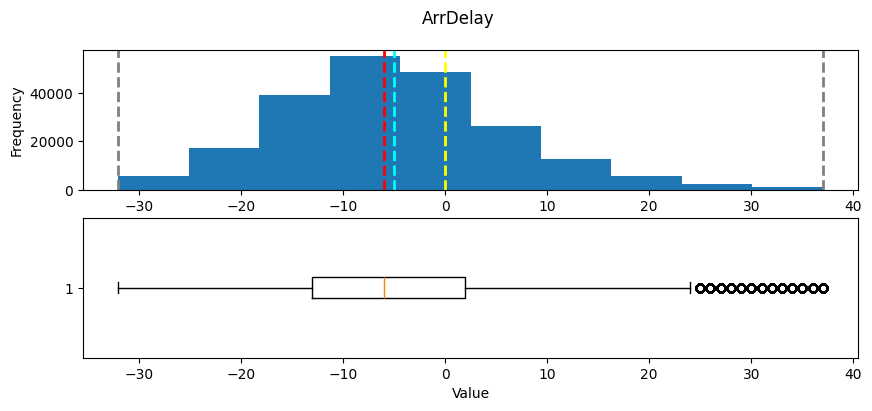

In [17]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

In [18]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000
